# 1. 바코드 인식 샘플

In [18]:
import pyzbar.pyzbar as pyzbar
import cv2
import matplotlib.pyplot as plt
import pandas as pd

8809180744146


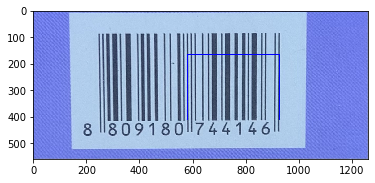

In [2]:
img = cv2.imread('img1.jpg',cv2.COLOR_BGR2GRAY)

decoded = pyzbar.decode(img)

for d in decoded:
    print(d.data.decode('utf-8'))
    ##print(d.type)
    cv2.rectangle(img, (d.rect[0], d.rect[1]), (d.rect[0] + d.rect[2], d.rect[1] + d.rect[3]), (0, 0, 255), 2)
    
plt.imshow(img)

# 2. 제품 데이터 일치 확인

## 1) 고객의 주문 내용 데이터 수신

In [71]:
products = pd.DataFrame(columns=['Product','Number'])
products.loc[1] = ['잘풀리는 집 보습 미용티수 230매',3]
products.loc[2] = ['커피여과지 40개입',1]
products.loc[3] = ['삼다수 2L',4]
products

,Product,Number
1,잘풀리는 집 보습 미용티수 230매,3
2,커피여과지 40개입,1
3,삼다수 2L,4


## 2) 데이터 베이스 바코드 정보 확인

In [72]:
df = pd.read_excel('종설_제품데이터수집.xlsx')
df = pd.DataFrame(data=df)
df.head(10)

,Number,Product,Width(cm),Height(cm),Depth(cm),Weight(g),Barcode Number
0,1,코멧 순백 3겹 라벤더 바닐라 롤 화장지,30.7,49.0,19.4,700,2491787579453
1,2,저자극 시그니처 아기 물티슈 엠보싱 캡형,20.0,15.0,8.0,350,5974512647044
2,3,EM 발효 숯 세안비누,7.0,6.5,2.4,100,1508875316943
3,4,1겹민자 롤형 핸드타올,20.0,20.0,5.0,60,2577525901777
4,5,샤오미 체지방 체중계 2세대,30.0,30.0,25.0,1700,1656386484740
5,6,깨끗한 2겹 무형광 핸드타올 (5000매),50.0,42.0,30.0,1400,5521304664851
6,7,프라그란스비즈 차량용 방향제,15.0,20.0,7.0,180,7738923681618
7,8,네이쳐리빙 모던데일 3단 무빙 트롤리 수납선반,40.0,64.0,21.5,4500,8369893618065
8,9,모노블 더길어진 반전매력 재활용 분리수거함,30.0,60.0,30.0,800,4861308483906
9,10,키친 스테인레스 식기건조대 2단,42.5,38.0,26.5,2200,3907072375514


In [73]:
df2 = df.drop(['Number','Width(cm)', 'Height(cm)', 'Depth(cm)','Weight(g)'], axis=1)
df2.head(5)

,Product,Barcode Number
0,코멧 순백 3겹 라벤더 바닐라 롤 화장지,2491787579453
1,저자극 시그니처 아기 물티슈 엠보싱 캡형,5974512647044
2,EM 발효 숯 세안비누,1508875316943
3,1겹민자 롤형 핸드타올,2577525901777
4,샤오미 체지방 체중계 2세대,1656386484740


In [123]:
data = pd.merge(products, df2,how='left')
data = data.sort_values('Barcode Number')
data = data.reset_index()
data = data.drop(['index'], axis=1)
data

,Product,Number,Barcode Number
0,커피여과지 40개입,1,4006508122134
1,삼다수 2L,4,8808244201045
2,잘풀리는 집 보습 미용티수 230매,3,8809180744146


## 3) 제품 바코드 인식

In [124]:
Sum_Number = 0
for i in range(len(data)):
    Sum_Number += data.iloc[i,1]  
Sum_Number

8

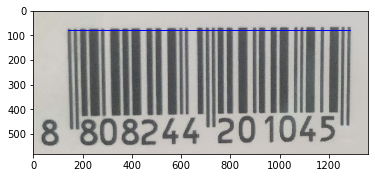

In [138]:
B_df = pd.DataFrame(columns=['Barcode Number'])

for i in range(Sum_Number):
    img_name = 'img%d.jpg'%i
    img = cv2.imread(img_name,cv2.COLOR_BGR2GRAY)
    decoded = pyzbar.decode(img)
    for d in decoded:
        #print(d.data.decode('utf-8'))
        cv2.rectangle(img, (d.rect[0], d.rect[1]), 
                      (d.rect[0] + d.rect[2], d.rect[1] + d.rect[3]), 
                      (0, 0, 255), 2)
        B_df.loc[i] = d.data.decode('utf-8')
        plt.imshow(img)

In [144]:
B_df_2 = pd.DataFrame(data=B_df['Barcode Number'].value_counts())
B_df_2 = B_df_2.reset_index()
B_df_2['Number'] = B_df_2['Barcode Number']
B_df_2['Barcode Number'] = B_df_2['index']
B_df_2 = B_df_2.sort_values('Barcode Number')
B_df_2 = B_df_2.reset_index()
B_df_2 = B_df_2.drop(['level_0'], axis=1)
B_df_2 = B_df_2.drop(['index'], axis=1)
B_df_2['Barcode Number'] = pd.to_numeric(B_df_2['Barcode Number'])
B_df_2

,Barcode Number,Number
0,4006508122134,1
1,8808244201045,4
2,8809180744146,3


In [143]:
data.iloc[:,1:3].eq(B_df_2)

,Barcode Number,Number
0,True,True
1,True,True
2,True,True


In [128]:
data

,Product,Number,Barcode Number
0,커피여과지 40개입,1,4006508122134
1,삼다수 2L,4,8808244201045
2,잘풀리는 집 보습 미용티수 230매,3,8809180744146


In [118]:
data.iloc[:,1:3]

,Number,Barcode Number
0,3,8809180744146
1,1,4006508122134
2,4,8808244201045
